In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate 
from scipy import stats
import matplotlib.dates as mdates

# read dataset
temp_data = pd.read_csv('FHLOO.csv', parse_dates = [0])
# delete useless columns
temp_data = temp_data.drop(columns = temp_data.columns[10])  
temp_data = temp_data.drop(columns = temp_data.columns[9])
temp_data = temp_data.drop(columns = temp_data.columns[8])
temp_data = temp_data.drop(columns = temp_data.columns[6])
temp_data = temp_data.drop(columns = temp_data.columns[3])
temp_data = temp_data.drop(columns = temp_data.columns[2])
temp_data = temp_data.drop(columns = temp_data.columns[0])
# rename date variable
temp_data = temp_data.rename(columns={"ISO_DateTime_PST": "Date"})
temp_data[temp_data == "nd"] = np.NaN # replace nd with nan
temp_data['Date']=pd.to_datetime(temp_data['Date']) # turn into datetime
temp_data['Sea_Temp_Oxygen']=temp_data['Sea_Temp_Oxygen'].astype('float64') # set the type
# get the date grouped by day
temp_data=temp_data.groupby([pd.Grouper(key='Date', 
                                        freq='D')]).mean(numeric_only = True)
# fill the gaps
inds = np.where(temp_data["Sea_Temp_Oxygen"].notnull()) # get data with values
inds = inds[0]
# interpolation
func = interpolate.interp1d(mdates.date2num(temp_data.iloc[inds].index),
                            temp_data.iloc[inds]['Sea_Temp_Oxygen'], 
                            kind = 'linear', bounds_error = False) 
# make new "Temp_inter" column here 
temp_data['Temp_inter'] = func(mdates.date2num(temp_data.index))
#display(temp_data) display the dataframe

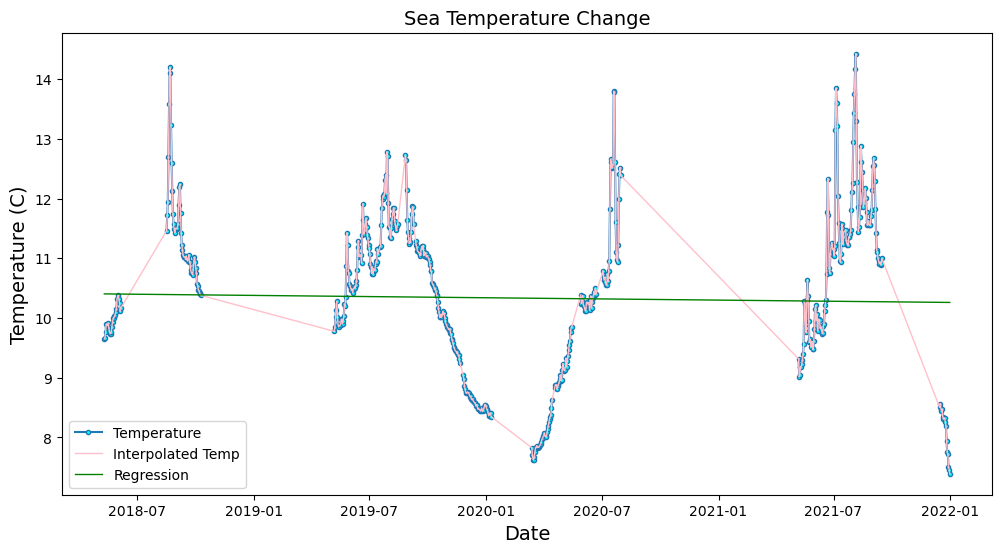

In [2]:
# plot the figure of interpolated temperature
fig,axs = plt.subplots(figsize=(12,6))
# set x y value and plot temperature
x=temp_data.index
y=temp_data['Sea_Temp_Oxygen']
axs.plot(x,y, marker = '.', markerfacecolor='cyan', label = 'Temperature')

# add labels
axs.set_xlabel('Date', fontsize=14)
axs.set_ylabel('Temperature (C)', fontsize=14)
axs.set_title('Sea Temperature Change', fontsize=14)
# fill the gaps with interpolated data
axs.plot(x,temp_data['Temp_inter'], color='pink', lw=1, label='Interpolated Temp')

# get linear regression terms
slope, intercept, rvalue, pvalue, stderr = stats.linregress(mdates.date2num(x), temp_data['Temp_inter'])
# calculate linear regression fit and store in regression column
temp_data['regression'] = mdates.date2num(x) * slope + intercept

# plot the linear regression in the subplot
axs.plot(x,temp_data['regression'], color='green', lw=1, label='Regression')
axs.legend() # add legend

# fig.savefig("figure1.png") save the figure

In [3]:
# read the file
juvenile = pd.read_csv('WDFW-_Juvenile_Population_Abundance.csv')
# display(juvenile) display the data

# species_array=pd.unique(juvenile['Species'])
# print(species_array) # get the names of salmons

# delete data before 2018
juvenile=juvenile.loc[juvenile['Migration Year']>=2018]
# get the total abundance based on years
salmon = juvenile.groupby(['Migration Year']).sum(numeric_only = True)
# get the abundance in different species based on years
species1 = juvenile.loc[juvenile['Species'] == 'Chum']
species1= species1.groupby(['Migration Year']).mean(numeric_only = True)
species2 = juvenile.loc[juvenile['Species'] == 'Chinook']
species2= species2.groupby(['Migration Year']).mean(numeric_only = True)
species3 = juvenile.loc[juvenile['Species'] == 'Coho']
species3= species3.groupby(['Migration Year']).mean(numeric_only = True)
species4 = juvenile.loc[juvenile['Species'] == 'Steelhead']
species4= species4.groupby(['Migration Year']).mean(numeric_only = True)
species5 = juvenile.loc[juvenile['Species'] == 'Cutthroat']
species5= species5.groupby(['Migration Year']).mean(numeric_only = True)

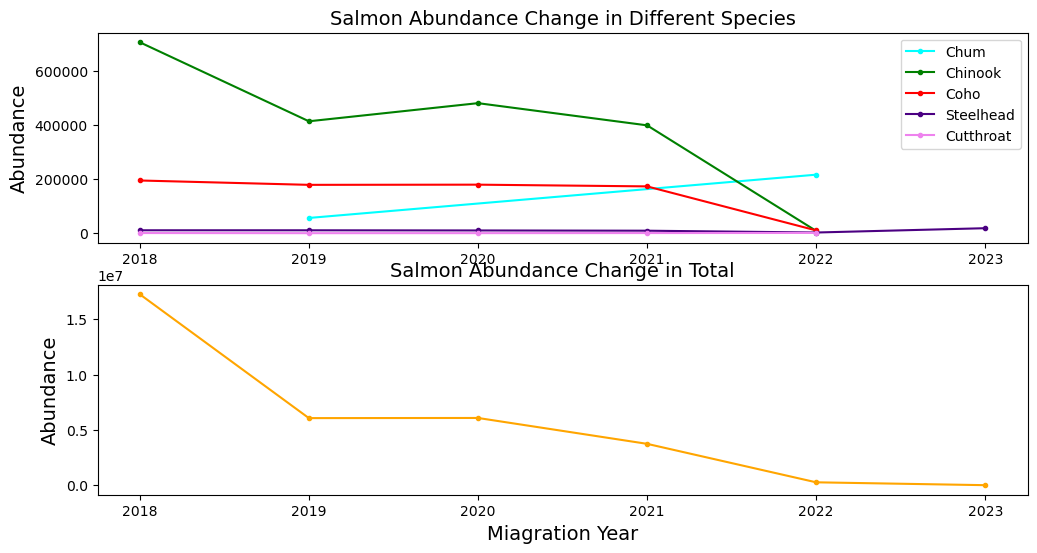

In [4]:
# create a figure
fig,(ax0,ax1) = plt.subplots(nrows=2,figsize=(12,6))
# plot the abundance for each species
ax0.plot(species1.index,species1['Abundance'], marker = '.', color='cyan', label = 'Chum')
ax0.plot(species2.index,species2['Abundance'], marker = '.', color='green', label = 'Chinook')
ax0.plot(species3.index,species3['Abundance'], marker = '.', color='red', label = 'Coho')
ax0.plot(species4.index,species4['Abundance'], marker = '.', color='indigo', label = 'Steelhead')
ax0.plot(species5.index,species5['Abundance'], marker = '.', color='violet', label = 'Cutthroat')

# add labels
ax0.set_ylabel('Abundance', fontsize=14)
ax0.set_title('Salmon Abundance Change in Different Species', fontsize=14)
ax0.legend() # add legend

# plot the abundance for all the salmon species
ax1.plot(salmon.index,salmon['Abundance'], marker = '.', color='orange', label = 'Salmons')
# add labels
ax1.set_xlabel('Miagration Year', fontsize=14)
ax1.set_ylabel('Abundance', fontsize=14)
ax1.set_title('Salmon Abundance Change in Total', fontsize=14)
plt.show()
# fig.savefig("figure2.png") save the figure